# Project 1

- load the dataset https://data.melbourne.vic.gov.au/api/views/ez6b-syvw/rows.csv into a Python Pandas dataframe and for each place of measurement and each type of data (temp, light, humidity) calculate and print nicely
 - median 
 - standard deviation 
- visualize each time series for respective places in the same figure as sugested in the charts below. The x-axis should have the correct time index indicated in the figure.

In [1]:
# activate pandas package
import pandas as pd

In [2]:
data = pd.read_csv("https://data.melbourne.vic.gov.au/api/views/ez6b-syvw/rows.csv")

In [3]:
data.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
0,12/15/2014 01:40:00 AM,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN
1,12/15/2014 01:40:00 AM,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN
2,12/15/2014 01:45:00 AM,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN
3,12/15/2014 01:45:00 AM,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN
4,12/15/2014 01:45:00 AM,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN


In [4]:
data.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [5]:
df=data
pd.to_datetime(df['timestamp'])
#df.info(verbose=True, memory_usage='deep')
df.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
0,12/15/2014 01:40:00 AM,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN
1,12/15/2014 01:40:00 AM,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN
2,12/15/2014 01:45:00 AM,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN
3,12/15/2014 01:45:00 AM,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN
4,12/15/2014 01:45:00 AM,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN


In [6]:
# some columns are totaly useless, you may want to drop them.
data.drop(columns=['mac', 'boardtype', 'Position', 'model', 'rowid'], inplace=True)
data.head(3)

,timestamp,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,elevation,location
0,12/15/2014 01:40:00 AM,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,-37.813408,144.979492,30.10,Fitzroy Gardens
1,12/15/2014 01:40:00 AM,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,-37.813073,144.980406,29.91,Fitzroy Gardens
2,12/15/2014 01:45:00 AM,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,-37.814922,144.982258,38.79,Fitzroy Gardens


Hmm, looks like some columns hold same values. Check if there are any rows where `temp_max`, `temp_min` and `temp_avg` are different. If there are none - drop `temp_max` and `temp_min`.

In [7]:
print(data.columns)

Index(['timestamp', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 'light_max',
       'light_min', 'light_avg', 'humidity_min', 'humidity_max',
       'humidity_avg', 'latitude', 'longitude', 'elevation', 'location'],
      dtype='object')


In [8]:
data.drop(['temp_max', 'temp_min', 'light_max',
       'light_min', 'humidity_min', 'humidity_max'], axis=1, inplace=True)

Try to print out the folowing information automaticaly with 5-6 lines of code ([for-loop](https://www.w3schools.com/python/python_for_loops.asp)):

`Fitzroy Gardens
	board 501 - rows 2903
	board 502 - rows 2725
	board 505 - rows 2915
	board 507 - rows 2918
	board 508 - rows 2728
Docklands Library
	board 506 - rows 6626
	board 509 - rows 19119
	board 510 - rows 12038
	board 511 - rows 4598`

In [9]:
# The following code calculates different board counts (sorted) in each location
for location in (pd.unique(data['location'])):
    print(location)
    new_data=data[data['location']==location] #make a subset of data frame for each location
    for board in sorted(pd.unique(new_data['boardid'])): #sort the board ids
        print('\t',"board {} - rows {}".format(board, new_data[new_data['boardid']==board]['boardid'].count()))

Fitzroy Gardens
	 board 501 - rows 2903
	 board 502 - rows 2725
	 board 505 - rows 2915
	 board 507 - rows 2918
	 board 508 - rows 2728
Docklands Library
	 board 506 - rows 6626
	 board 509 - rows 19119
	 board 510 - rows 12038
	 board 511 - rows 4598


## Median (aka expected value)

You'd like to have a function that takes an unsorted pandas.Series object (or a list) and returns a median for it.

Sort the serie: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html (or your list).

There are two opotions: odd and even number of elements.

If the number is odd, return an element with the index 'length of serie floor divided by 2'

If the number is even, return a half sum of two middle elements.

You can use `.iloc[]` to access the position of a row if pandas.Series object. Remember that the position is zero-based. https://stackoverflow.com/a/31593712

In [10]:
def median (serie):
    pass
    # your code here
    n = len(serie)
    s = sorted(serie)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

In [11]:
# median test
ts = [pd.Series([4,3,1,2])]
ts.append(pd.Series([4,3,1,2,100]))
ts.append(pd.Series([4,3,1,2,None]))
ts.append([1,4,3,2])
for test in ts:
    if type(test) == pd.Series : 
        print(median(test), test.median())

2.5 2.5
3 3.0
3.0 2.5


Implement the function `print_stats`, please.

In [12]:
# prety printing function
# you should provide function's name (median) as argument to parameter 'func'
def print_stats(func, title='', data=None):
    pass
    # your code here
    print(title)
    for location in sorted(pd.unique(data['location'])):
        #print('{}s for locations'.format(str(func))
        print(location)
        new_data=data[data['location']==location] #make a subset of data frame for each location
        print('\t', ' temp', '\t''\t', func(new_data['temp_avg'].tolist())) #didn't add dropna() because there was none
        print('\t', ' light', '\t', func(new_data['light_avg'].tolist()))
        print('\t', ' humidity', '\t', func(new_data['humidity_avg'].tolist()))
        for board in sorted(pd.unique(new_data['boardid'])): #sort the board ids
            print('\t',"board {} - elevation {}".format(board, new_data[new_data['boardid']==board]['elevation'].mean(skipna=True).round(2)))
            print('\t''\t', ' temp', '\t''\t', func(new_data[new_data['boardid']==board]['temp_avg'].dropna().tolist()))
            print('\t''\t', ' light', '\t', func(new_data[new_data['boardid']==board]['light_avg'].dropna().tolist()))
            print('\t''\t', ' humidity', '\t', func(new_data[new_data['boardid']==board]['humidity_avg'].dropna().tolist()))

Here is the example result of the function call:

In [13]:
print_stats (median, title='Medians for locations:', data=data)

Medians for locations:
Docklands Library
	  temp 		 17.4
	  light 	 13.1
	  humidity 	 51.9
	 board 506 - elevation 0.71
		  temp 		 16.5
		  light 	 8.5
		  humidity 	 48.6
	 board 509 - elevation 0.03
		  temp 		 17.4
		  light 	 29.1
		  humidity 	 56.2
	 board 510 - elevation 2.74
		  temp 		 17.1
		  light 	 73.75
		  humidity 	 49.2
	 board 511 - elevation 3.75
		  temp 		 18.7
		  light 	 13.55
		  humidity 	 50.2
Fitzroy Gardens
	  temp 		 19.0
	  light 	 83.9
	  humidity 	 47.7
	 board 501 - elevation 29.96
		  temp 		 19.0
		  light 	 88.2
		  humidity 	 47.3
	 board 502 - elevation 22.57
		  temp 		 18.1
		  light 	 84.6
		  humidity 	 49.9
	 board 505 - elevation 29.91
		  temp 		 20.0
		  light 	 78.3
		  humidity 	 51.0
	 board 507 - elevation 38.79
		  temp 		 19.0
		  light 	 86.8
		  humidity 	 48.3
	 board 508 - elevation 30.1
		  temp 		 19.0
		  light 	 83.25
		  humidity 	 43.3


## Standard deviation

Write a function that takes `pandas.Series` object and returns standard deviation.

First calculate `mean = serie.sum() / serie.count()`

Then make a Series object which contains `squares_off_difference` between every measured value and the `mean`.

Then return sqrt of ratio of `squares_off_difference.sum()` to number of elements in `serie` minus 1.

In [14]:
def st_dev (ser):
    pass
    # your code here
    m = sum(ser) / len(ser)
    v  = sum((x-m)**2 for x in ser) / (len(ser)-1)
    return v**(1./2.)

In [15]:
test = pd.Series(range(10))
print(st_dev(test));  print(test.std())

3.0276503540974917
3.0276503540974917


You can reuse your solution for median printout, now with `st_dev` function

In [16]:
print_stats (st_dev, title='St. dev. for locations:', data=data)

St. dev. for locations:
Docklands Library
	  temp 		 5.667560241023549
	  light 	 43.96524426170967
	  humidity 	 11.880782111547742
	 board 506 - elevation 0.71
		  temp 		 5.384911871937537
		  light 	 39.27311735860222
		  humidity 	 14.654803635444036
	 board 509 - elevation 0.03
		  temp 		 5.519770834499096
		  light 	 44.774208264442365
		  humidity 	 11.812527950967048
	 board 510 - elevation 2.74
		  temp 		 6.062988612574066
		  light 	 45.242772209049896
		  humidity 	 8.61697519960944
	 board 511 - elevation 3.75
		  temp 		 5.218765467205754
		  light 	 41.320870542623425
		  humidity 	 11.63984963194113
Fitzroy Gardens
	  temp 		 4.735745529488179
	  light 	 43.512744009807435
	  humidity 	 16.89874478857988
	 board 501 - elevation 29.96
		  temp 		 5.264597595776863
		  light 	 44.836967678531984
		  humidity 	 28.19104557413932
	 board 502 - elevation 22.57
		  temp 		 4.584110890776315
		  light 	 43.38271876341441
		  humidity 	 11.99932209552406
	 board 505 - elevati

## Visualisation

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [18]:
# if you need nicer printing
# https://docs.python.org/3/library/pprint.html
import pprint
pp = pprint.PrettyPrinter(indent=4)

Have a look at https://pandas.pydata.org/pandas-docs/stable/timeseries.html

Have you noticed that column `timestamp` in our data is a string? We have to convert it to `pandas.Timestamp` to be able to plot measurements correctly.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [19]:
type(data.timestamp[0])

str

In [20]:
type(data.index)

pandas.core.indexes.range.RangeIndex

In [21]:
data.index = pd.DatetimeIndex(data['timestamp']) # your code here

Now we can use our index as timebased. Note that values are non unique and there will be a small performance penalty: https://stackoverflow.com/a/16629125 

In [22]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

Now we can easily plot all measurements from some location and from some period of time.

For example: average temperature at *Fitzroy Gardens* only from 2014.

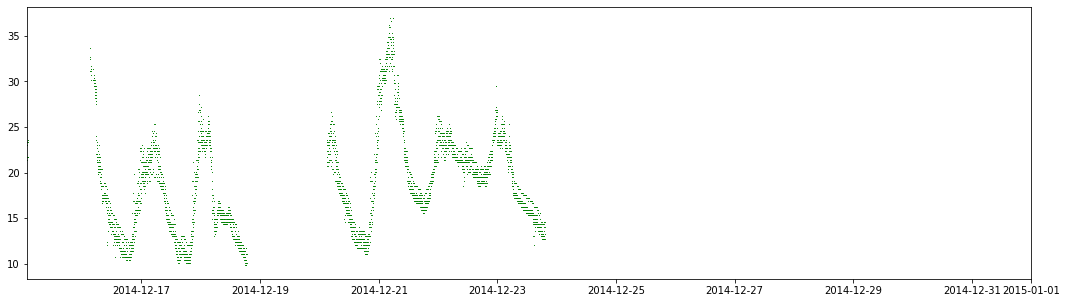

In [23]:
# model
t_min = data.index.min()
t_max = pd.Timestamp('2015-01-01')

plt.figure(figsize=(18,5))
plt.xlim(t_min, t_max)

location_filter = data.location == 'Fitzroy Gardens'
time_filter     = data.index < t_max
data_filtered   = data[location_filter & time_filter]
#boards          = data_filtered.boardid.unique()

plt.plot(data_filtered.index, data_filtered.temp_avg, ',', c='g', alpha=.9)
plt.show()

Can you color separate different boards?

Can your plot the median?

In [24]:
xmin, xmax = data.index.min(), pd.Timestamp('2015-01-01')
measurments = ['temp_avg', 'light_avg', 'humidity_avg']
colors = ['#d73027','#f46d43','#fdae61','#FFBF00','#aaaa9a','#82FA58','#a6d96a','#66bd63','#1a9850']

In [25]:
color_dict={506:'#d73027',509:'#f46d43',510:'#fdae61',511:'#FFBF00',501:'#aaaa9a',502:'#82FA58',505:'#a6d96a',507:'#66bd63',508:'#1a9850'}
#for key in board_dict.keys():
    #print(key)
    #if board_dict[key] in locations:
print(color_dict)
hue_order=[506, 509, 510, 511, 501, 502, 505, 507, 508]

{506: '#d73027', 509: '#f46d43', 510: '#fdae61', 511: '#FFBF00', 501: '#aaaa9a', 502: '#82FA58', 505: '#a6d96a', 507: '#66bd63', 508: '#1a9850'}


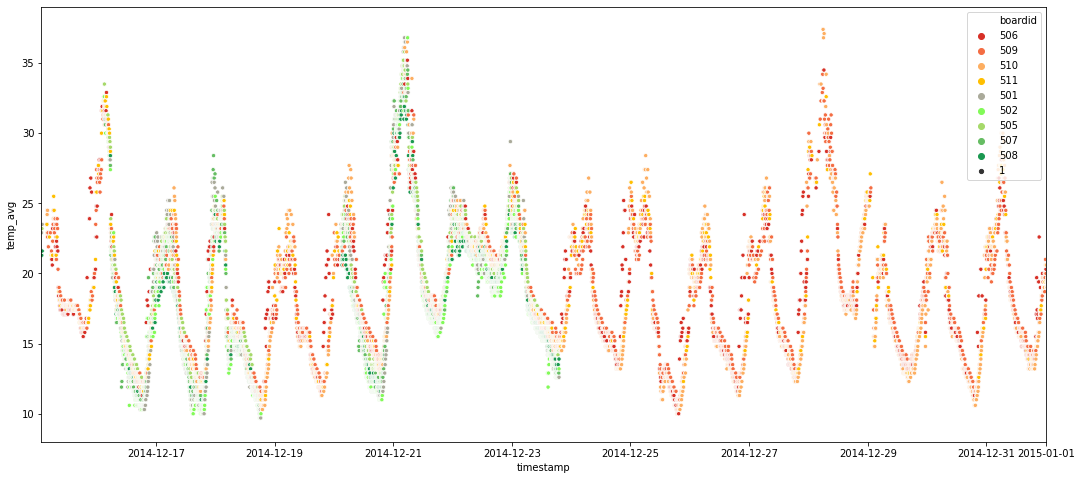

In [26]:
# model
chart = plt.figure(figsize=(18,8))
plt.xlim(xmin, xmax) # time limits for the chart

# your code here

#plt.ylim(data['temp_avg'].min(),data['temp_avg'].max())
import seaborn as sns
plt.ylim(8, 39)
#color_groups = (colors[:4], colors[4:]) 
sns.scatterplot(x=data.index, y='temp_avg', data=data, hue='boardid', palette=color_dict, hue_order=hue_order, size=1)
plt.legend(loc = 1)
plt.show()

In [27]:
# helper function
# see https://matplotlib.org/api/axes_api.html
def get_sub_ax(ax, xbound=(data.index.min(), data.index.max()), ybound=(0, 100)):
    ax_i = ax.twinx(); # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html
    ax_i.set_ybound(ybound); # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ybound.html
    ax_i.set_xbound(xbound)
    ax_i.set_autoscaley_on(False); 
    ax_i.yaxis.tick_left()
    ax_i.grid(b=True, color='b', alpha=.1, axis='y') # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html
    return ax_i

In [28]:
# automation ploting with a function
def plot_time_range (t_min_str, t_max_str, marker=',', resample='15Min'):
    # plt (=matplotlib.pyplot) is just a state-based INTERFACE to matplotlib 
    # se https://matplotlib.org/api/pyplot_summary.html
    
    # basic preparations
    fig, ax = plt.subplots(figsize=(18,7))
    ax.set_yticks([]) # remove from empty axes, we will not plot there 
    ax.grid(b=True, color='b', alpha=.1, axis='x')
    
    # for color separation of 2*3 series
    color_groups = (list('rgb'), list('myc')) 
    
    t_min = pd.Timestamp(t_min_str)
    t_max = pd.Timestamp(t_max_str)
    
    # your code here
    
    # display
    plt.show()